# Data adjustment + enrichment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("./irius_threats_microservice.csv")

df

,Component,Use Case,Source,Threat,Risk response,Inherent Risk,Current Risk,Countermeasure Progress,Weakness Tests,Countermeasure Tests,Projected Risk,Owner
0,API gateway,Authentication and Authorization,Created by rules engine,Authentication Bypass,Planned Mitigation: 0%. Mitigated: 0%. Unmitig...,High,High,0%,Not tested,Not tested,High,Tomasz Skrond
1,API gateway,Logging and Monitoring,Created by rules engine,Exploitation of insufficient logging and monit...,Planned Mitigation: 0%. Mitigated: 0%. Unmitig...,High,High,0%,Not tested,Not tested,High,Tomasz Skrond
2,Catalog DB,Access service,Created by rules engine,Attackers gain access to unauthorised data by ...,Planned Mitigation: 0%. Mitigated: 0%. Unmitig...,Critical,Critical,0%,Not tested,Not tested,Critical,Tomasz Skrond
3,Catalog DB,Access service,Created by rules engine,Authentication Bypass,Planned Mitigation: 0%. Mitigated: 0%. Unmitig...,High,High,0%,Not tested,Not tested,High,Tomasz Skrond
4,Catalog DB,Access service,Created by rules engine,Data leakage or disclosure to unauthorized par...,Planned Mitigation: 0%. Mitigated: 0%. Unmitig...,High,High,0%,Not tested,Not tested,High,Tomasz Skrond
...,...,...,...,...,...,...,...,...,...,...,...,...
123,Web Client,General,Created by rules engine,An adversary embeds malicious scripts in conte...,Planned Mitigation: 0%. Mitigated: 0%. Unmitig...,High,High,0%,Not tested,Not tested,High,Tomasz Skrond
124,Web Client,General,Created by rules engine,Application contains security vulnerabilities ...,Planned Mitigation: 0%. Mitigated: 0%. Unmitig...,Critical,Critical,0%,Not tested,Not tested,Critical,Tomasz Skrond
125,Web Client,General,Created by rules engine,Attackers gain unauthorised access to data or ...,Planned Mitigation: 0%. Mitigated: 0%. Unmitig...,Critical,Critical,0%,Not tested,Not tested,Critical,Tomasz Skrond
126,Web Client,General,Created by rules engine,Attackers gain unauthorised access to the appl...,Planned Mitigation: 0%. Mitigated: 0%. Unmitig...,High,High,0%,Not tested,Not tested,High,Tomasz Skrond


### Print All Threats

In [2]:
threats = df["Threat"]
threats_unique = df["Threat"].unique()

print(threats.tolist())
print(len(threats))

['Authentication Bypass', 'Exploitation of insufficient logging and monitoring', 'Attackers gain access to unauthorised data by exploiting vulnerabilities in the service', 'Authentication Bypass', 'Data leakage or disclosure to unauthorized parties', 'Attackers who compromise the application or application server could directly access and modify the data store', 'Sensitive data is exposed through weak security configurations', 'Attackers use known cloud vulnerabilities to access unauthorized data', 'Excessive Allocation', 'Attackers compromise images by modifying their content', 'Attackers gain access to the sensitive data through injecting code in the repositories', 'Availability is compromised through attacks against scalability configuration', 'Sensitive data is compromised by unauthorized access to container volumes', 'Exploitation of insufficient logging and monitoring', 'Sensitive data is compromised through network access', 'Attackers gain unauthorised access to data and/or syst

### Add threats abbrieviations for cleaner plotting + map each threat to STRIDE nomenclature

In [3]:
threats_gpt = [
    'Authentication Bypass', 'Insufficient Logging', 'Unauthorized Data Access', 'Authentication Bypass',
    'Data Leakage', 'App Data Manipulation', 'Weak Security Config', 'Cloud Vulnerability', 'Excessive Allocation',
    'Image Tampering', 'Code Injection', 'Scalability Attack', 'Container Access', 'Insufficient Logging',
    'Network Compromise', 'SQL Injection', 'Unauthorized Data Access', 'Authentication Bypass', 'Data Leakage',
    'App Data Manipulation', 'Weak Security Config', 'Cloud Vulnerability', 'Excessive Allocation', 'Image Tampering',
    'Code Injection', 'Scalability Attack', 'Container Access', 'Insufficient Logging', 'Network Compromise',
    'SQL Injection', 'Cross-Site Scripting', 'Security Misconfiguration', 'Third-Party Access', 'Client-Side Secret',
    'Deprecated Technology', 'Cross-Site Scripting', 'Man-in-the-Middle Attack', 'Privilege Abuse', 'ClickJacking',
    'Weak Security Config', 'Cloud Vulnerability', 'Excessive Allocation', 'Image Tampering', 'Code Injection',
    'Scalability Attack', 'Container Access', 'Insufficient Logging', 'Network Compromise', 'Unauthorized Data Access',
    'Authentication Bypass', 'Data Leakage', 'App Data Manipulation', 'Weak Security Config', 'Cloud Vulnerability',
    'Excessive Allocation', 'Image Tampering', 'Code Injection', 'Scalability Attack', 'Container Access',
    'Insufficient Logging', 'Network Compromise', 'SQL Injection', 'Malicious Push Notifications', 'Man-in-the-Middle Attack',
    'SQL Injection', 'Environment Control', 'Account Configuration Flaw', 'Denial of Service', 'Data Deletion',
    'Command Injection', 'Security Misconfiguration', 'Behavior Modification', 'Unnecessary Privileges',
    'Improper ACL Configuration', 'WebView Data Access', 'Error Handling Flaw', 'Buffer Overflow', 'Cross-Site Scripting',
    'Security Misconfiguration', 'Third-Party Access', 'Client-Side Secret', 'Deprecated Technology', 'Cross-Site Scripting',
    'Man-in-the-Middle Attack', 'Privilege Abuse', 'ClickJacking', 'Unauthorized Data Access', 'Authentication Bypass',
    'Data Leakage', 'App Data Manipulation', 'Weak Security Config', 'Cloud Vulnerability', 'Excessive Allocation',
    'Image Tampering', 'Code Injection', 'Scalability Attack', 'Container Access', 'Insufficient Logging',
    'Network Compromise', 'SQL Injection', 'Unauthorized Data Access', 'Authentication Bypass', 'Data Leakage',
    'App Data Manipulation', 'Weak Security Config', 'Cloud Vulnerability', 'Excessive Allocation', 'Image Tampering',
    'Code Injection', 'Scalability Attack', 'Container Access', 'Insufficient Logging', 'Network Compromise', 'SQL Injection',
    'Weak Security Config', 'Cloud Vulnerability', 'Excessive Allocation', 'Image Tampering', 'Code Injection',
    'Scalability Attack', 'Container Access', 'Insufficient Logging', 'Network Compromise', 'Cross-Site Scripting',
    'Security Misconfiguration', 'Client-Side Secret', 'Deprecated Technology', 'Man-in-the-Middle Attack'
]

threat_mapping = dict(zip(df["Threat"].unique(), threats_gpt))
df['Threat abbv'] = threats_gpt
# df['Threat'] = df['Threat'].map(threat_mapping)

# df.to_csv("output_to_check.csv",index=True)

threats_to_stride = {
    'Authentication Bypass': 'Spoofing',
    'Exploitation of insufficient logging and monitoring': 'Repudiation',
    'Attackers gain access to unauthorised data by exploiting vulnerabilities in the service': 'Information Disclosure',
    'Data leakage or disclosure to unauthorized parties': 'Information Disclosure',
    'Attackers who compromise the application or application server could directly access and modify the data store': 'Tampering',
    'Sensitive data is exposed through weak security configurations': 'Information Disclosure',
    'Attackers use known cloud vulnerabilities to access unauthorized data': 'Information Disclosure',
    'Excessive Allocation': 'Denial of Service',
    'Attackers compromise images by modifying their content': 'Tampering',
    'Attackers gain access to the sensitive data through injecting code in the repositories': 'Information Disclosure',
    'Availability is compromised through attacks against scalability configuration': 'Denial of Service',
    'Sensitive data is compromised by unauthorized access to container volumes': 'Information Disclosure',
    'Sensitive data is compromised through network access': 'Information Disclosure',
    'Attackers gain unauthorised access to data and/or systems through SQL Injection attacks': 'Elevation of Privilege',
    'An adversary embeds malicious scripts in content that will be served to web browsers': 'Elevation of Privilege',
    'Application contains security vulnerabilities not identified during the development process': 'Information Disclosure',
    'Attackers gain unauthorised access to data by compromising third party web resources': 'Information Disclosure',
    'Attackers gain unauthorised access to data or services by accessing a client side secret': 'Information Disclosure',
    'Attackers gain unauthorised access to the application by the use of deprecated client-side technologies': 'Elevation of Privilege',
    'Attackers could gain access to sensitive data through a man in the middle attack': 'Information Disclosure',
    'Privilege Abuse': 'Elevation of Privilege',
    'Attackers cause users to perform arbitrary clicks on the site through ClickJacking attacks': 'Elevation of Privilege',
    'An attacker could send malicious push notifications, leading to unauthorized actions, data breaches, or phishing attacks': 'Information Disclosure',
    'Attackers gain unauthorized access to the control of the environment': 'Elevation of Privilege',
    'Attackers gain unauthorized access to the user account due to the lack of configuration of the account': 'Elevation of Privilege',
    'Attackers perform a Denial of Service (DoS)': 'Denial of Service',
    'Data is intentionally or accidentally deleted': 'Tampering',
    'An attacker attempts to invoke all common switches and options to discover weaknesses': 'Information Disclosure',
    'Attacker gains access to sensitive data by modifying the application\'s expected behavior': 'Tampering',
    'Users lose trust in the application because it requests unnecessary privileges': 'Elevation of Privilege',
    'Accessing Functionality Not Properly Constrained by ACLs': 'Elevation of Privilege',
    'Attackers gain access to the data through the WebView functionality': 'Information Disclosure',
    'Attackers gain unauthorised access to the application through an error handling flaw': 'Elevation of Privilege',
    'Attackers gain unauthorised access to the application through buffer overflow flaws': 'Elevation of Privilege'
}

df['STRIDE Category'] = df['Threat'].map(threats_to_stride)

df.head()

,Component,Use Case,Source,Threat,Risk response,Inherent Risk,Current Risk,Countermeasure Progress,Weakness Tests,Countermeasure Tests,Projected Risk,Owner,Threat abbv,STRIDE Category
0,API gateway,Authentication and Authorization,Created by rules engine,Authentication Bypass,Planned Mitigation: 0%. Mitigated: 0%. Unmitig...,High,High,0%,Not tested,Not tested,High,Tomasz Skrond,Authentication Bypass,Spoofing
1,API gateway,Logging and Monitoring,Created by rules engine,Exploitation of insufficient logging and monit...,Planned Mitigation: 0%. Mitigated: 0%. Unmitig...,High,High,0%,Not tested,Not tested,High,Tomasz Skrond,Insufficient Logging,Repudiation
2,Catalog DB,Access service,Created by rules engine,Attackers gain access to unauthorised data by ...,Planned Mitigation: 0%. Mitigated: 0%. Unmitig...,Critical,Critical,0%,Not tested,Not tested,Critical,Tomasz Skrond,Unauthorized Data Access,Information Disclosure
3,Catalog DB,Access service,Created by rules engine,Authentication Bypass,Planned Mitigation: 0%. Mitigated: 0%. Unmitig...,High,High,0%,Not tested,Not tested,High,Tomasz Skrond,Authentication Bypass,Spoofing
4,Catalog DB,Access service,Created by rules engine,Data leakage or disclosure to unauthorized par...,Planned Mitigation: 0%. Mitigated: 0%. Unmitig...,High,High,0%,Not tested,Not tested,High,Tomasz Skrond,Data Leakage,Information Disclosure


# Most useful data
Tasks:
1. Link Components with Threats [ x ]
2. Link Components with Inherent Risks [ x ]
3. Link Components with STRIDE Category [ x ]
4. Link Use Cases with Threats [ x ]

In [4]:
useful = df[["Component","Use Case","Threat","Threat abbv","Inherent Risk","STRIDE Category"]]
useful.head()

,Component,Use Case,Threat,Threat abbv,Inherent Risk,STRIDE Category
0,API gateway,Authentication and Authorization,Authentication Bypass,Authentication Bypass,High,Spoofing
1,API gateway,Logging and Monitoring,Exploitation of insufficient logging and monit...,Insufficient Logging,High,Repudiation
2,Catalog DB,Access service,Attackers gain access to unauthorised data by ...,Unauthorized Data Access,Critical,Information Disclosure
3,Catalog DB,Access service,Authentication Bypass,Authentication Bypass,High,Spoofing
4,Catalog DB,Access service,Data leakage or disclosure to unauthorized par...,Data Leakage,High,Information Disclosure


# Threats + risk per component

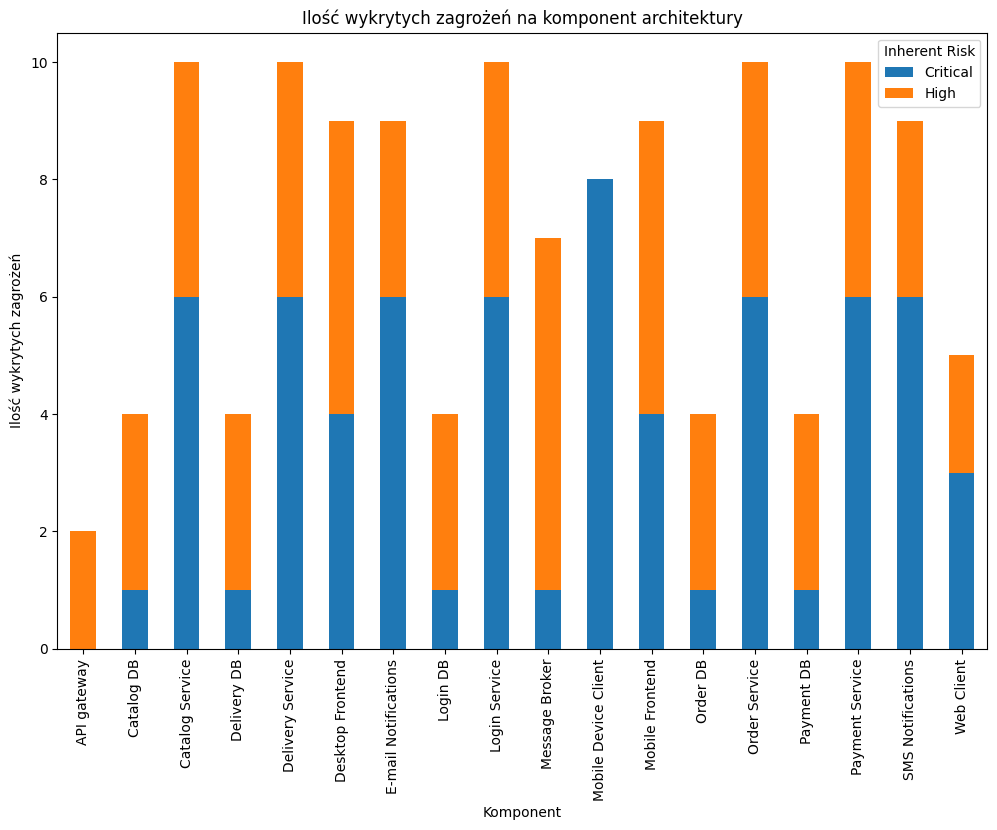

In [5]:
grouped_df = df.groupby(['Component', 'Inherent Risk']).size().unstack(fill_value=0)

grouped_df.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Ilość wykrytych zagrożeń na komponent architektury')
plt.xlabel('Komponent')
plt.ylabel('Ilość wykrytych zagrożeń')
plt.legend(title='Inherent Risk')
plt.show()

# Threats in components

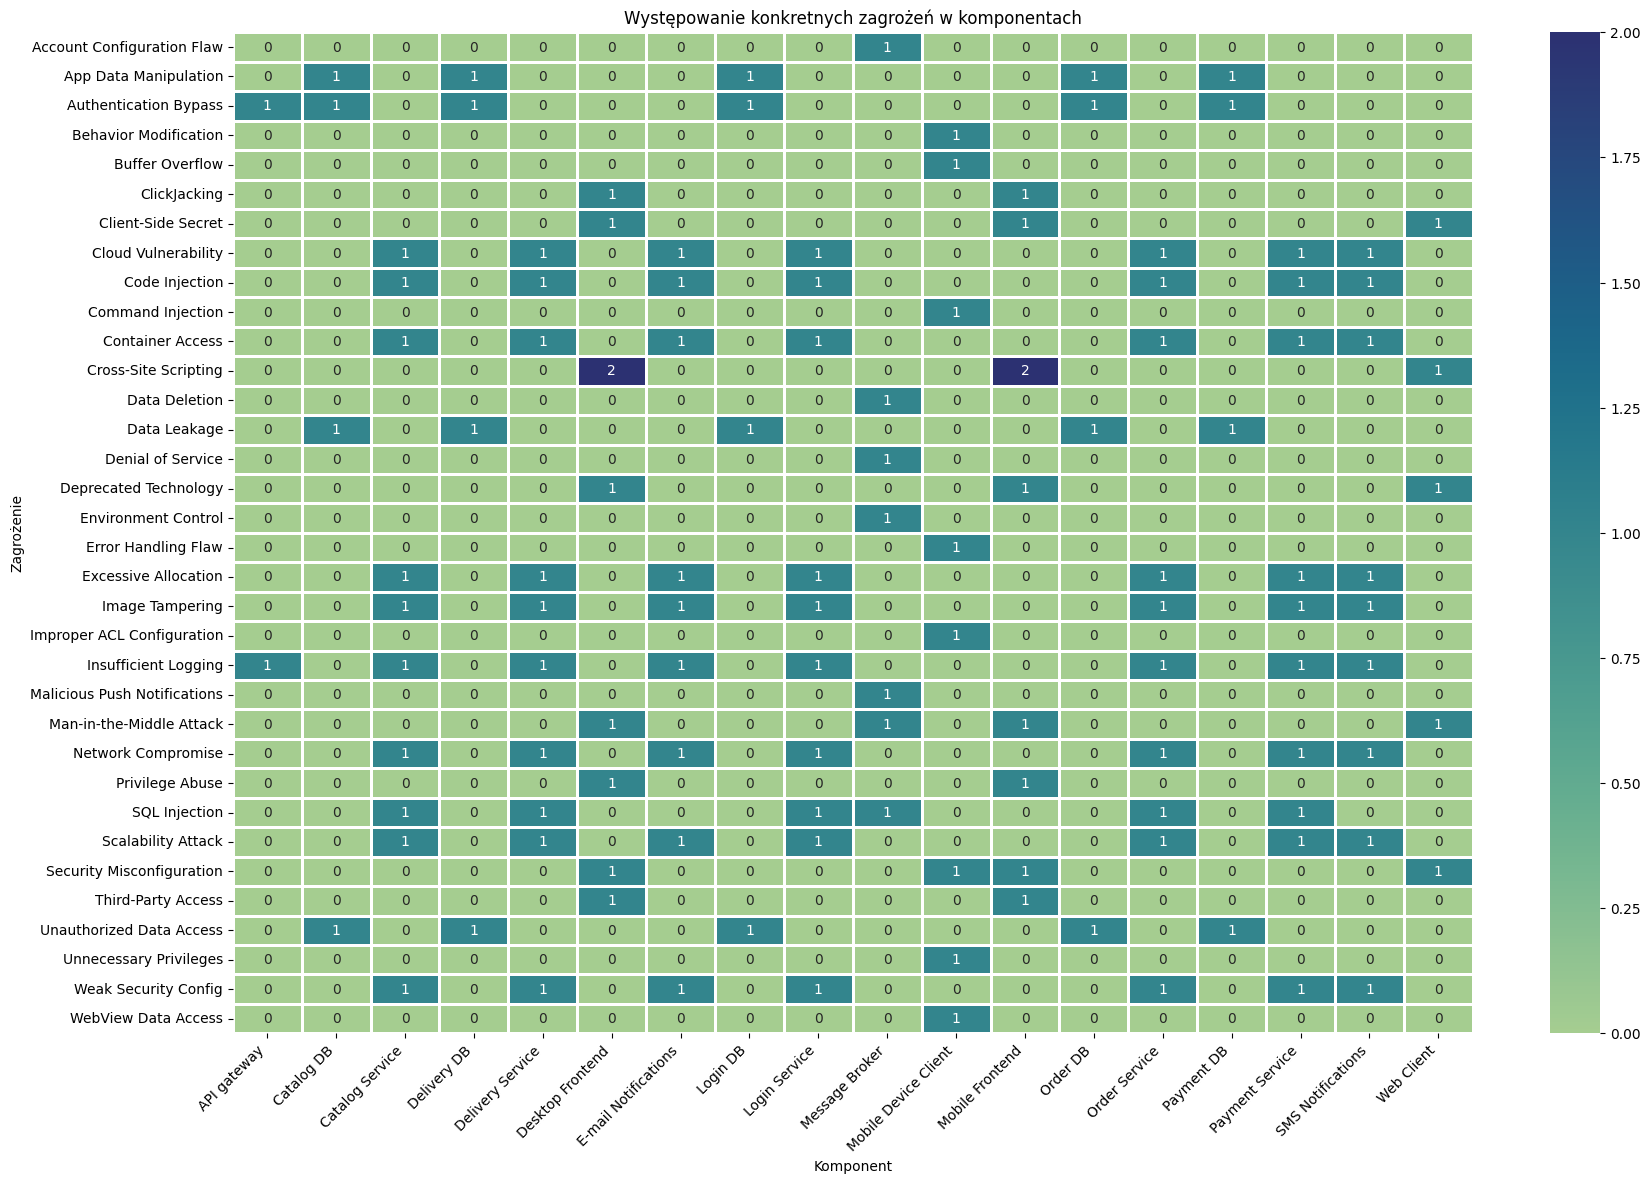

In [6]:

heatmap_data = df.groupby(['Threat abbv', 'Component']).size().unstack(fill_value=0)

# Plot the heatmap
plt.figure(figsize=(20, 13))
sns.heatmap(heatmap_data, annot=True, fmt="d",linewidths=1, cmap="crest")
plt.title('Występowanie konkretnych zagrożeń w komponentach')
plt.xlabel('Komponent')
plt.ylabel('Zagrożenie')
plt.xticks(rotation=45,ha="right")
plt.show()

# STRIDE Categories in Components

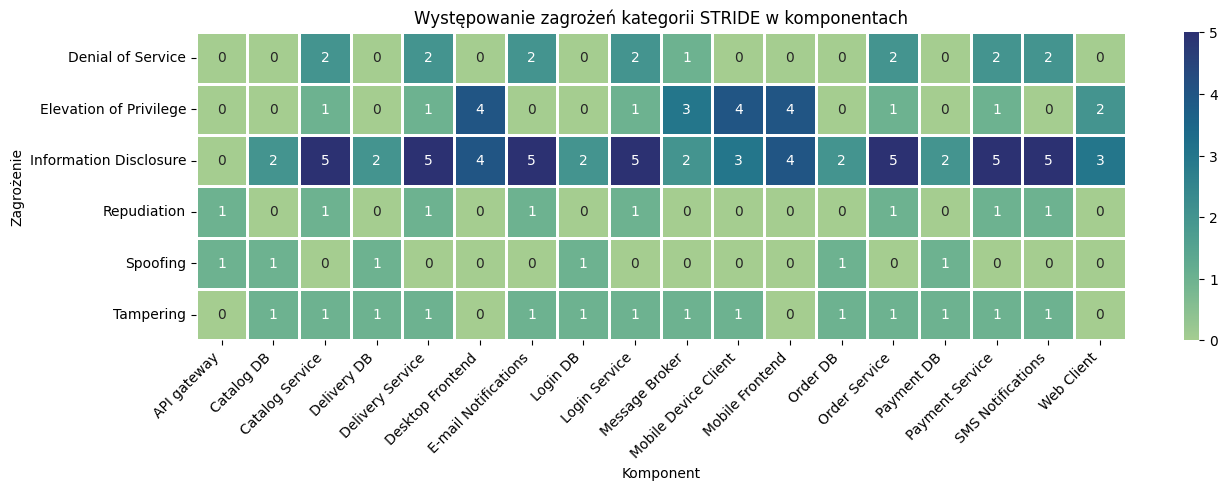

In [7]:
component_category_heatmap = df.groupby(['STRIDE Category','Component']).size().unstack(fill_value=0)
plt.figure(figsize=(15, 4))
sns.heatmap(component_category_heatmap, annot=True,linewidth=1,cmap="crest")
plt.title('Występowanie zagrożeń kategorii STRIDE w komponentach')
plt.xlabel('Komponent')
plt.ylabel('Zagrożenie')
plt.xticks(rotation=45,ha="right")
plt.show()

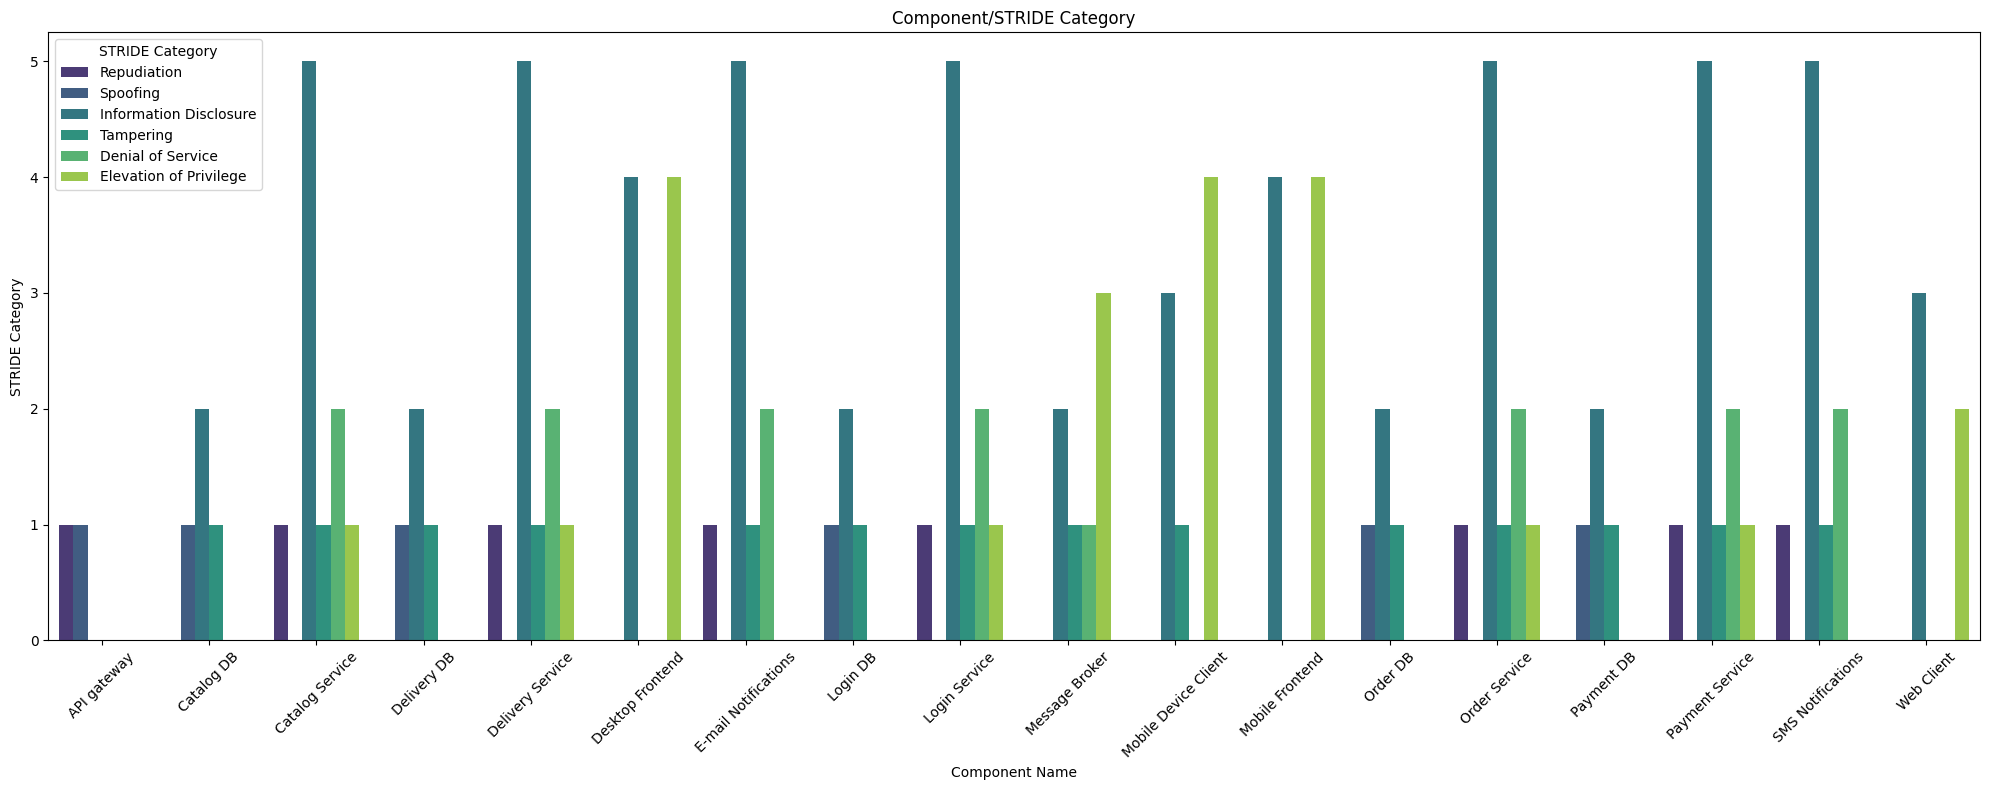

In [8]:
component_category_counts = df.groupby(['Component','STRIDE Category']).size().reset_index(name='Count')

# Plotting the data
plt.figure(figsize=(20, 8))
sns.barplot(x='Component', y='Count', hue='STRIDE Category', data=component_category_counts, palette='viridis')
plt.title('Component/STRIDE Category')
plt.xlabel('Component Name')
plt.ylabel('STRIDE Category')
plt.xticks(rotation=45)
plt.legend(title='STRIDE Category')
plt.tight_layout()
plt.show()

# Threats in use cases

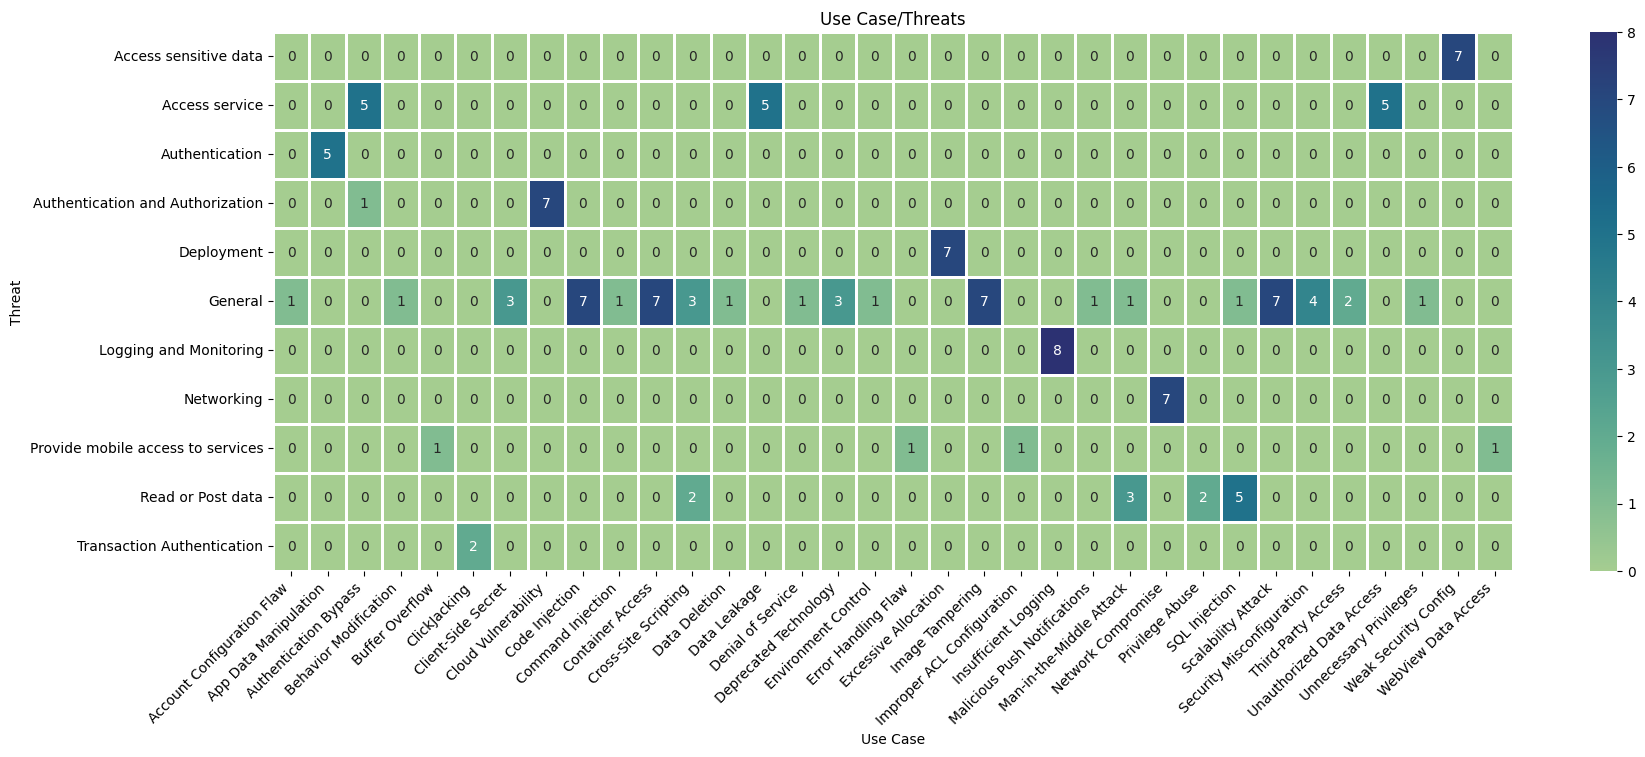

In [9]:
usecase_threat_heatmap = df.groupby(['Use Case','Threat abbv']).size().unstack(fill_value=0)
plt.figure(figsize=(20,7))
sns.heatmap(usecase_threat_heatmap, annot=True,linewidth=1,cmap="crest")
plt.title('Use Case/Threats')
plt.xlabel('Use Case')
plt.ylabel('Threat')
plt.xticks(rotation=45,ha="right")
plt.show()